# Имитация подбора пароля с помощью генетического алгоритма

Предположим что длинна пароля 20 символов. Используется 500 символов ASCII, правая сторона пароля задается пробелом



In [ ]:
import random
import numpy
import matplotlib.pyplot as plt

## Задаём пароль и проверяем корректность

In [ ]:
l = 20 # длинна пароля

# password = input('Введите пароль: ')
password = 'asd45fyjae'

password = [x for x in password]
if len(password) <l:
    [password.append(' ') for x in range(l-len(password))]
    
print('Password: ', password)

Password:  ['a', 's', 'd', '4', '5', 'f', 'y', 'j', 'a', 'e', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [ ]:
# list_of_values = [i for i in values]
list_of_values = [chr(i) for i in range(20, 512)]
list_of_values.append(' ')
# bot = print(random.sample(list_of_values,l))
print('Possible values of password: ', list_of_values)

for i in password:
    if i not in list_of_values:
        print('ERROR')

Possible values of password:  ['\x14', '\x15', '\x16', '\x17', '\x18', '\x19', '\x1a', '\x1b', '\x1c', '\x1d', '\x1e', '\x1f', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x80', '\x81', '\x82', '\x83', '\x84', '\x85', '\x86', '\x87', '\x88', '\x89', '\x8a', '\x8b', '\x8c', '\x8d', '\x8e', '\x8f', '\x90', '\x91', '\x92', '\x93', '\x94', '\x95', '\x96', '\x97', '\x98', '\x99', '\x9a', '\x9b', '\x9c', '\x9d', '\x9e', '\x9f', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹

## Giperparams

In [ ]:
N = 100        # Общее число ботов
NSURV = 20     # Количество выживших (столько лучших переходит в новую популяцию)
nnew = N-NSURV # Количество новых (столько новых ботов создается)
EPOCHS = 2000   # количество эпох
MUT = 0.5      # коэфициент мутаций
FREQ_MUT_CHANGE = int(EPOCHS/5 )# чатота уменьшения мутации


eph_change_mut = [x for x in range(FREQ_MUT_CHANGE, EPOCHS, FREQ_MUT_CHANGE)] # эпохи смены коэфициента мутации
new_mut = [MUT/x for x in range(1, int(EPOCHS/FREQ_MUT_CHANGE))]         # новый коэфициент мутаци



## Fit and result

400 0.3333333333333333
800 0.2222222222222222
1200 0.14814814814814814
Выполненно на эпохе:  1214


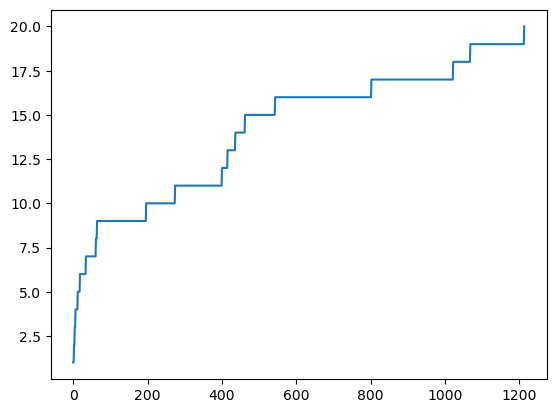

In [ ]:
mut = MUT
# trains = train.shape[0] # Количество вагонов поезда
popul = np.ones([N, l], dtype=str)     # Двумерный массив популяции, размерностью [n, l].
result = np.zeros(N)
# result = np.zeros(N)
plot_values = [] # значения для графика по среднему значению
m = []
# plotminval = []  # значения для графика по минимальному значению

# Create first generation
for i in range(N):
#     print('Da')
    popul[i,] = random.sample(list_of_values, l)
# [popul[i] = random.sample(list_of_values, l) for i in range(N)]
next_popul = popul
for e in range(1, EPOCHS):
    
    if e%FREQ_MUT_CHANGE== 0:
        
        mut/=1.5
        print(e, mut)
    result = [int(sum(next_popul[i] == password)) for i in range(N)]    # получаем результаты 
    m.append(mut*100)
    plot_values.append(max(result))
    if max(result) == l:
        print('Выполненно на эпохе: ', e)
        
        break
    ind = np.argsort(result) # получаем лучшие индексы
    
    next_popul = next_popul[ind][-NSURV:] # популяция с лучшими результатами
    for i in range (N - NSURV): # add next population
        first_parent = next_popul[random.randint(0, NSURV - 1)]
        second_parent = next_popul[random.randint(0, NSURV - 1)]
        
        # добавляем скрещивание 
        new_bot = [first_parent[i] if random.random()>0.5 else second_parent[i] for i in range(l)]
        # добавляем мутацию
        new_bot = np.array([new_bot[i] if random.random()>mut else random.choice(list_of_values) for i in range(l)]).reshape((1,l))


        
        next_popul = np.concatenate((next_popul, new_bot), axis = 0)
    
    

plt.plot(plot_values)
# plt.plot(m)

In [ ]:
popul.shape

(100, 20)

# Решение нелинейного уравнения



$f(xy)=7x^2 - y + \frac{y^3 - x^2}{3x} + y^2 - 21x$


## giperparams

In [ ]:
N = 100        # Общее число ботов
NSURV = 20     # Количество выживших (столько лучших переходит в новую популяцию)
nnew = N-NSURV # Количество новых (столько новых ботов создается)
EPOCHS = 50000   # количество эпох
er = int(EPOCHS/10)
# BIG_EPOCHS
MUT = 1      # коэфициент мутаций
FREQ_MUT_CHANGE = int(er/25 )# чатота уменьшения мутации
l=2 # кол-во координат

In [ ]:
popul = np.random.rand(N, l)/np.random.rand(N, l)     # Двумерный массив популяции, размерностью [n, l].
result = np.array([my_evaluate(x,y) for x,y in popul])

ind = np.argsort(result) # получаем лучшие индексы
print(popul.shape, result.shape, ind)

next_popul = popul[ind][:NSURV] # популяция с лучшими результатами

(100, 2) (100,) [48 15 64 60 19 33 94 77 57 82 86 56 75 58 74 35 88 71 83 39 63 70 97 76
 96  0 41 93 79 69 51 72 91 22  6 46 12 20 26 34 59  5 25 61 55 38 37  3
 67 32 65 52 54 49 84 68 95 30 85 66 31 21 99 50 24 17  7 98 40 14 29  1
 23 36  4 27 43  9 53 28 11 78 92 87 90 89 62 45 13  8 81 80 47 16 42 73
  2 44 10 18]


## Fit and result.
решение достаточно примитивное, но пока оставим

Найденно решение выполненно на эпохе: 1306 решение: [0.09932712 1.92510551] результат: 7.0866535413216525e-06
Найденно решение выполненно на эпохе: 1607 решение: [0.00946621 1.16567825] результат: 3.802139670894267e-05
Найденно решение выполненно на эпохе: 2674 решение: [0.13111684 2.07843419] результат: 6.3298777006615126e-06
Найденно решение выполненно на эпохе: 5548 решение: [-0.00396919  0.90925152] результат: 4.442989124953112e-05
Найденно решение выполненно на эпохе: 15300 решение: [1.2099326  2.92682779] результат: 8.586937264354333e-05
Найденно решение выполненно на эпохе: 15829 решение: [0.15508748 2.17551522] результат: 8.2266692339239e-05
Найденно решение выполненно на эпохе: 17330 решение: [3.63174658 0.10594572] результат: 4.823974225587335e-05
Найденно решение выполненно на эпохе: 20546 решение: [0.06761117 1.73314216] результат: 2.8296199808597322e-05
Найденно решение выполненно на эпохе: 21186 решение: [0.71144466 2.92060161] результат: 3.431018016541998e-05
Найденно ре

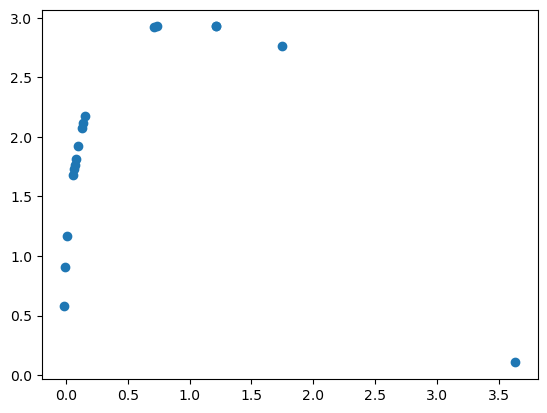

In [ ]:
mut = MUT
plot_values = []
# initialization
def my_evaluate(x,y):
    answer = np.abs(7*x**2-y+(y**3-x**2)/3*x+y**2-21*x)
    return answer

popul = np.random.rand(N, l)/np.random.rand(N, l)     # Двумерный массив популяции, размерностью [n, l].
result = np.array([my_evaluate(x,y) for x,y in popul])

answers = []
for e in range(1, EPOCHS):
    
    if e%FREQ_MUT_CHANGE== 0:
        
        mut/=1.5
#         print('Эпока: {}, коэффициент мутации{}'.format(e, mut))
    
    m.append(mut*100)
    plot_values.append(min(result))
    
    if e%er== 0:
        mut = MUT
        popul = np.random.rand(NSURV, l)/np.random.rand(NSURV, l)     # Двумерный массив популяции, размерностью [n, l].
        result = np.array([my_evaluate(x,y) for x,y in popul])    
    
    result = np.array([my_evaluate(x,y) for x,y in popul])
    ind = np.argsort(result) # получаем лучшие индексы
    popul = popul[ind][:NSURV] # популяция с лучшими результатами
    
    ###### add выход из цикла
    if min(result) < 0.0001:
        
        print('Найденно решение выполненно на эпохе:', e, 'решение:', popul[0], 'результат:', my_evaluate(popul[0,0], popul[0,1]))
        answers.append(list(popul[0]))
        mut = MUT
        popul = np.random.rand(NSURV, l)/np.random.rand(NSURV, l)     # Двумерный массив популяции, размерностью [n, l].
        result = np.array([my_evaluate(x,y) for x,y in popul])
#         break
    #########
    
    for i in range (N - NSURV): # add next population
        first_parent = next_popul[random.randint(0, NSURV - 1)]
        second_parent = next_popul[random.randint(0, NSURV - 1)]
        
        new_bot = [0., 0.]
        
        # добавляем скрещивание 
        
        new_bot = [first_parent[i] if random.random()>0.5 else second_parent[i] for i in range(l)]
        # добавляем мутацию
        new_bot = np.array([new_bot[i] if random.random()>mut else new_bot[i]*random.random()/random.random()+0.5-random.random() for i in range(l)]).reshape((1,l))
        
        popul = np.concatenate((popul, new_bot), axis = 0)
    
    
# plt.plot(plot_values)
plt.scatter(np.array(answers)[:, 0], np.array(answers)[:, 1])
# popul.shape, result.shape

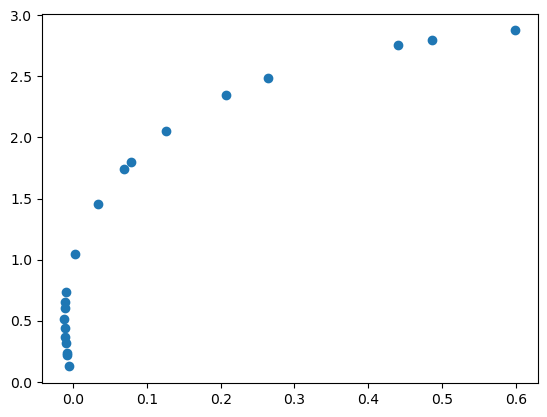

In [ ]:
# answers
np.array(answers)[:, 1]
plt.scatter(np.array(answers)[:, 0], np.array(answers)[:, 1])

In [ ]:
np.array(answers)[:, 1]

array([1.48249153, 0.0622149 , 0.53986706, 0.11283212, 0.53980891,
       1.44255734, 1.04303505])

In [ ]:
next_popul = popul
for e in range(1, EPOCHS):
    
    if e%FREQ_MUT_CHANGE== 0:
        
        mut/=1.5
        print(e, mut)
    result = [int(sum(next_popul[i] == password)) for i in range(N)]    # получаем результаты 
    m.append(mut*100)
    plot_values.append(max(result))
    if max(result) == l:
        print('Выполненно на эпохе: ', e)
        
        break
    ind = np.argsort(result) # получаем лучшие индексы
    
    next_popul = next_popul[ind][-NSURV:] # популяция с лучшими результатами
    for i in range (N - NSURV): # add next population
        first_parent = next_popul[random.randint(0, NSURV - 1)]
        second_parent = next_popul[random.randint(0, NSURV - 1)]
        
        # добавляем скрещивание 
        new_bot = [first_parent[i] if random.random()>0.5 else second_parent[i] for i in range(l)]
        # добавляем мутацию
        new_bot = np.array([new_bot[i] if random.random()>mut else random.choice(list_of_values) for i in range(l)]).reshape((1,l))


        
        next_popul = np.concatenate((next_popul, new_bot), axis = 0)
    
    

plt.plot(plot_values)

In [ ]:
for e in range(1, EPOCHS):
    
    if e%FREQ_MUT_CHANGE== 0:
        
        mut/=1.5
        print(e, mut)
    result = [int(sum(next_popul[i] == password)) for i in range(N)]    # получаем результаты 
    m.append(mut*100)
    plot_values.append(max(result))
    if max(result) == l:
        print('Выполненно на эпохе: ', e)
        
        break
    ind = np.argsort(result) # получаем лучшие индексы
    
    next_popul = next_popul[ind][-NSURV:] # популяция с лучшими результатами
    for i in range (N - NSURV): # add next population
        first_parent = next_popul[random.randint(0, NSURV - 1)]
        second_parent = next_popul[random.randint(0, NSURV - 1)]
        
        # добавляем скрещивание 
        new_bot = [first_parent[i] if random.random()>0.5 else second_parent[i] for i in range(l)]
        # добавляем мутацию
        new_bot = np.array([new_bot[i] if random.random()>mut else random.choice(list_of_values) for i in range(l)]).reshape((1,l))


        
        next_popul = np.concatenate((next_popul, new_bot), axis = 0)
    
    

plt.plot(plot_values)


(100, 2)

# Подбор архитектуры линейной нейронной сети с помощью генетического алгоритма для задачи предскзаания тренда акций


##**Инфо по выделенным ресурсам**

Данный служебный код помогает понять тип графической карты, подключенной к ноутбуку. 

Не забудьте уточнить, что среда выполнения в настройках колаба GPU или TPU. 


In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install -q gputil
!pip install -q psutil
!pip install -q humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
process = psutil.Process(os.getpid())
print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
print("GPU Model: ", gpu.name)

  Preparing metadata (setup.py) ... done
Gen RAM Free: 12.4 GB  | Proc size: 89.4 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total 15360MB
GPU Model:  Tesla T4


## Libs

In [ ]:
# Загрузка библиотек

# Пандас
import pandas as pd 

# Numpy
import numpy as np 

# random
import random

# из tensorflow
# оптимайзер для обучения нс
from tensorflow.keras.optimizers import Adam

# Два варианта сборки моделей
from tensorflow.keras.models import Sequential, Model 

# Стандартные слои моделей нс
from tensorflow.keras.layers import concatenate, Reshape, Input, Dense, Dropout, Conv1D, LSTM, MaxPooling1D
from tensorflow.keras.layers import BatchNormalization, Flatten, GlobalAveragePooling1D, Activation, GlobalMaxPooling1D

# функция ошибки для обучения нс
from tensorflow.keras.losses import MAE

# для отрисовки дерева слоев нс
from tensorflow.keras.utils import plot_model

# Нормировщики данных
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Для генерации выборки временных рядов
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 

# Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import matplotlib.pyplot as plt 

# для загрузки данных по ссылке
import gdown

# модуль подсчета времени
import time

## Dataset

In [ ]:
import gdown

# Загрузка датасетов из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l11/SBER_MIN60.txt', None, quiet=True)

'SBER_MIN60.txt'

In [ ]:
# Чтение данных в таблицу Pandas и назначение имен столбцов
data = pd.read_csv('SBER_MIN60.txt', sep="\t", names=['Datetime', 'Open', 'High', 'Low', 'Close'])

# Настройка имен столбцов
COL_DATE = 'Datetime'
COL_CLOSE = 'Close'

# Настройка временного интервала для ограничения данных
TIME_RANGE = ('2010-09-01 10:00:00.000', '2018-12-31 23:59:00.000')

# Преобразование столбца даты в индекс таблицы и удаление ненужного столбца даты
data.index = pd.to_datetime(data[COL_DATE])
data.drop(columns=COL_DATE, inplace=True)

# Отбор данных по заданному временному интервалу
mask = (data.index >= TIME_RANGE[0]) & (data.index <= TIME_RANGE[1])
data = data[mask]
data

,Open,High,Low,Close
Datetime,,,,
2010-09-01 10:00:00,78.55,78.67,77.94,78.04
2010-09-01 11:00:00,78.04,78.10,77.60,78.00
2010-09-01 12:00:00,78.00,78.88,77.98,78.88
2010-09-01 13:00:00,78.89,79.19,78.80,78.85
2010-09-01 14:00:00,78.85,78.99,78.61,78.86
...,...,...,...,...
2018-12-29 14:00:00,186.07,186.08,185.78,185.88
2018-12-29 15:00:00,185.88,185.95,185.70,185.70
2018-12-29 16:00:00,185.70,186.15,185.70,186.15


###Иллюстрация данных в графическом виде

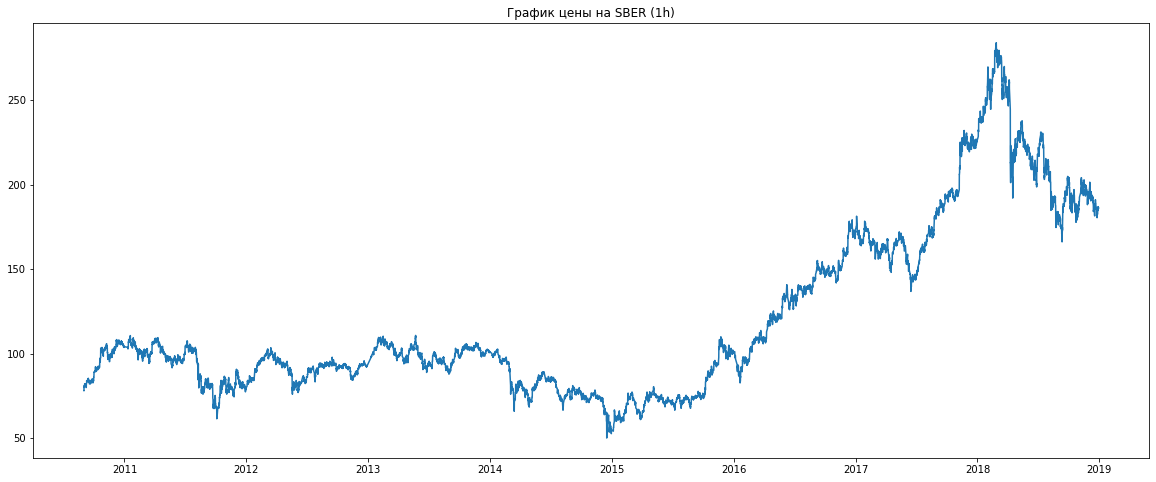

In [ ]:
# Отображение временного ряда в графическом виде
plt.figure(figsize=(20, 8))
plt.plot(data.index, data[COL_CLOSE])
plt.title('График цены на SBER (1h)')
plt.show()

## Giperparams

In [ ]:
# # Расчет индикаторов относительной доходности
# for i in range(1, INDICATOR_DEPTH + 1):
#     indicator_change = f'Close_chng_{i}'
#     # Относительная доходность в сотых долях за период i шагов назад
#     data[indicator_change] = data[COL_CLOSE].pct_change(i)

# Проверка результата
print(data.shape)
data[:5]

(18818, 4)


,Open,High,Low,Close
Datetime,,,,
2010-09-01 10:00:00,78.55,78.67,77.94,78.04
2010-09-01 11:00:00,78.04,78.10,77.60,78.00
2010-09-01 12:00:00,78.00,78.88,77.98,78.88
2010-09-01 13:00:00,78.89,79.19,78.80,78.85
2010-09-01 14:00:00,78.85,78.99,78.61,78.86


In [ ]:
# Задание текстовых меток каналов данных (столбцов)
CHANNEL_NAMES = ['Open',	'High',	'Low',	'Close']

# Получение словаря с именами и индексами каналов данных
CHANNEL_INDEX = {name: chan for chan, name in enumerate(CHANNEL_NAMES)}
print(CHANNEL_INDEX)

{'Open': 0, 'High': 1, 'Low': 2, 'Close': 3}


In [ ]:
data = data.to_numpy()

###Иллюстрация данных в графическом виде

Выведем данные для дальнейшей работы. Данные будут отображаться с позиции с номером `start`, длиной `length` отчетов. Отрисуем четыре линии со значениями OPEN, MIN, MAX, CLOSE и гистограммы по значению закрытия торгов:


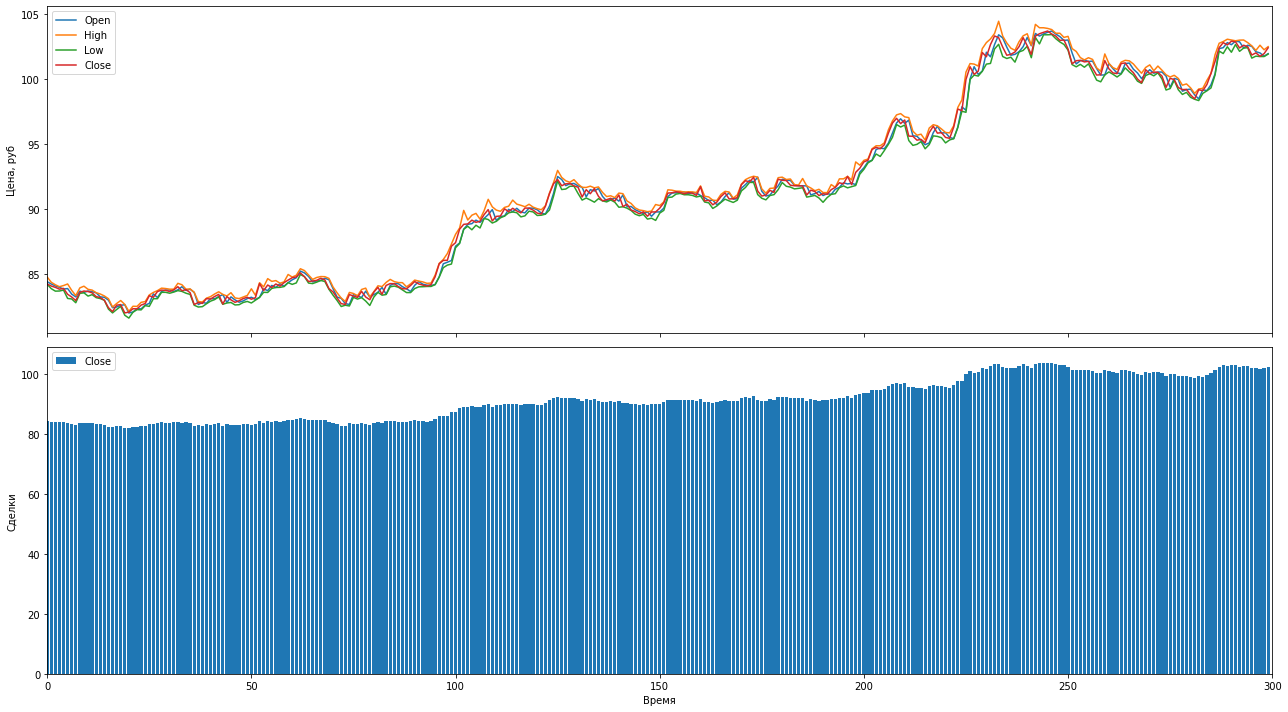

In [ ]:
# Отображение исходных данных от точки start и длиной length
start = 100
length = 300

# Задание полотна для графиков - два подграфика один под другим с общей осью x
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

# Четыре основных канала - open, max, min, close
for chn in range(4):
    # Отрисовка одного канала данных
    # От начальной точки start длиной length
    ax1.plot(data[start:start + length, chn],
             label=CHANNEL_NAMES[chn])
ax1.set_ylabel('Цена, руб')
ax1.legend()

# Канал volume (объем)
ax2.bar(x=np.arange(length), 
        height=data[start:start + length, CHANNEL_INDEX['Close']],
        label='Close')
ax2.set_ylabel('Сделки')
ax2.legend()

plt.xlabel('Время')
# Регулировка пределов оси x
plt.xlim(0, length)
# Указание расположить подграфики плотнее друг к другу
plt.tight_layout()
# Фиксация графика
plt.show()

### Подготовка выборок данных для нейросети




In [ ]:
# Словарь каналов данных с их индексами
print(CHANNEL_INDEX)

{'Open': 0, 'High': 1, 'Low': 2, 'Close': 3}


Установим гиперпараметры, отберем входные и выходные параметры. 300 отчетов, 30 тысяч примеров пойдут в проверочную выборку:

In [ ]:
# Задание гиперпараметров
CHANNEL_X = CHANNEL_NAMES                 # Отбор каналов входных данных
CHANNEL_Y = ['Close']                     # Отбор каналов данных для предсказания
SEQ_LEN = 300                             # Длина прошедших данных для анализа
BATCH_SIZE = 32                           # Объем батча для генератора
TEST_LEN = 3000                          # Объем тестовой выборки
TRAIN_LEN = data.shape[0] - TEST_LEN      # Объем обучающей выборки

Определим, какие данные пойдут в выборки. Разделим основной набор данных на обучающую и тестовую выборки. Обязательно нормируем данные. То же самое сделаем с выходными данными. При помощи генератора создадим выборки для обучения и проверки:

In [ ]:
# Формирование списков индексов каналов данных для входных и выходных выборок
chn_x = [CHANNEL_INDEX[c] for c in CHANNEL_X]
chn_y = [CHANNEL_INDEX[c] for c in CHANNEL_Y]

# Проверка результата
print(chn_x, chn_y)

# Разделение данных на тренировочный и тестовый наборы
# 2*SEQ_LEN - для разрыва между тренировочными и тестовыми данными 
# варьируемый параметр, страховка от пересечения
data_train, data_test = data[:TRAIN_LEN], data[TRAIN_LEN + 2*SEQ_LEN:]

# Отбор входных данных
x_data_train, x_data_test = data_train[:, chn_x], data_test[:, chn_x]

# Масштабирование данных
x_scaler = MinMaxScaler()
x_scaler.fit(x_data_train)
x_data_train = x_scaler.transform(x_data_train)
x_data_test = x_scaler.transform(x_data_test)

# Отбор выходных данных
y_data_train, y_data_test = data_train[:, chn_y], data_test[:, chn_y]

# Масштабирование данных
y_scaler = MinMaxScaler()
y_scaler.fit(y_data_train)
y_data_train = y_scaler.transform(y_data_train)
y_data_test = y_scaler.transform(y_data_test)

# Проверка формы данных
print(f'Train data: {x_data_train.shape}, {y_data_train.shape}')
print(f'Test  data: {x_data_test.shape}, {y_data_test.shape}')

# Создание генератора для обучения
train_datagen = TimeseriesGenerator(x_data_train, 
                                    y_data_train,
                                    length=SEQ_LEN,
                                    stride=1,
                                    sampling_rate=1,
                                    batch_size=BATCH_SIZE)

# Аналогичный генератор для валидации при обучении
val_datagen = TimeseriesGenerator(x_data_test, 
                                  y_data_test,
                                  length=SEQ_LEN,
                                  stride=1,
                                  sampling_rate=1,
                                  batch_size=BATCH_SIZE)

# Проверка формы выдаваемого генератором результата
print(f'Train batch x: {train_datagen[0][0].shape}, y: {train_datagen[0][1].shape}')

[0, 1, 2, 3] [3]
Train data: (15818, 4), (15818, 1)
Test  data: (2400, 4), (2400, 1)
Train batch x: (32, 300, 4), y: (32, 1)


In [ ]:
inputShape = train_datagen[0][0].shape
print(inputShape)
outputShape = train_datagen[0][1].shape
print(outputShape)

(32, 300, 4)
(32, 1)


In [ ]:
# Генератор тестовой выборки, генерирует один батч на всю выборку
test_datagen = TimeseriesGenerator(x_data_test, 
                                   y_data_test,
                                   length=SEQ_LEN,
                                   stride=1,
                                   sampling_rate=1,
                                   batch_size=x_data_test.shape[0])

# Формирование тестовой выборки из генератора
x_test, y_test = test_datagen[0]

# Проверка формы тестовой выборки
print(f'Test x: {x_test.shape}, y: {y_test.shape}')

Test x: (2100, 300, 4), y: (2100, 1)


### Сервисные функции

также из лекции "Базовый блок | Обработка временных рядов с помощью нейронных сетей (Практика 1) | УИИ"

Вспомним эти сервисные функции, которые упростят дальнейшие эксперименты с архитектурами НС:
- `get_pred()` – обученная модель. Предсказывает результат, который возвращается к ненормированным данным;
- `correlate()` – расчет коэффициента автокорреляции;
- `show_predict()` – построение графиков предсказания и верных ответов;
- `auto_corr()` – расчет и построение графика автокорреляции;

In [ ]:
def get_pred(currModel, 
             xVal, 
             yVal, 
             yScaler):
  '''
  Функция рассчитываем результаты прогнозирования сети
  В аргументы принимает сеть (currModel) и проверочную выборку
  Выдаёт результаты предсказания predVal
  И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
  '''
  
  # Вычисление и деномализация предсказания
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  
  # Денормализация верных ответов
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  # И возвращаем исходны масштаб данных, до нормализации
  return (predVal, yValUnscaled)


# Функция расёта корреляции дух одномерных векторов

def correlate(a, 
              b):
  # Рассчитываем основные показатели
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  
  #Рассчитываем корреляцию
  val = 0
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val # аналог функции в нампи np.corrcoef(a, b)[0, 1]


def show_predict(start, 
                 step, 
                 channel, 
                 predVal, 
                 yValUnscaled):
  '''
  Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
  start - точка с которой начинаем отрисовку графика
  step - длина графика, которую отрисовываем
  channel - какой канал отрисовываем
  '''
  
  plt.figure(figsize=(12, 5))
  plt.plot(predVal[start:start+step, channel], 
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()
  


def auto_corr(channels, corrSteps, predVal, yValUnscaled, plot_graf = True, return_data = False):
  '''
  Функция рисуем корреляцию прогнозированного сигнала с правильным
  Смещая на различное количество шагов назад
  Для проверки появления эффекта автокорреляции
  channels - по каким каналам отображать корреляцию
  corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
  showGraf - показываем график или нет
  returnData - возвращаем массивы автокорреляции или нет
  '''
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] # Запоминаем размер проверочной выборки

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, ch]))

    own_corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    if plot_graf: #Если нужно показать график
      plt.figure(figsize=(12, 5))
      plt.plot(corr, label='предсказание на ' + str(ch+1) + ' шаг')
      plt.plot(own_corr, label='Эталон')

  if plot_graf: #Если нужно показать график
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.legend()
    plt.show()

  if return_data: #Если нужно вернуть массивы автокорреляции
     return corr, own_corr

## Подбор линейной архитектуры

В данном разделе мы будем искать оптимальный состав линейной нейросети

 Будем искать сеть со следующей логикой построения:
 
 **Входной блок**

*   0 - делаем ли нормализацию
*   1 - размер первого свёрточного слоя
*   2 - ядро первого свёрточного слоя 
*   3 - функция активации первого слоя
*   4 - делаем ли MaxPooling0
*   5 - размер MaxPooling0

**Первый скрытый блок**

*   6 - Делаем ли второй сверточный слой
*   7 - размер второго сверточного слоя
*   8 - ядро второго сверточного слоя
*   9 - делаем ли MaxPooling1
*   10 - размер MaxPooling1
*   11 - функция активации

**Второй скрытый блок**

*   12 - Делаем ли третий сверточный слой
*   13 - размер третьего сверточного слоя
*   14 - ядро третьего сверточного слоя
*   15 - делаем ли MaxPooling2
*   16 - размер MaxPooling2
*   17 - функция активации 

----
**Третий скрытый блок Dense до Flatten()**
*   18 - Делаем ли дополнительный полносвязного слой
*   19 - размер полносвязного слоя
*   20 - функция активации дополнительного слоя
----

**Предпоследний скрытый слой**

*   21 - функция активации предпоследнего слоя
*   23 - делаем ли нормализацию 

**Выходной слой**

*   22 - функция активации выходного слоя
*   24 - размер полносвязного слоя

## Функция формирования модели из бота

Применим еще пару идей:
- проверим идею стоит поставить дополнительный полносвязный слой до вытягивания значений в вектор или передовать данные сразу со сверточного блока
- для формирования значений размера свертки и количества нейронов будем использывать степень `2`. То есть будем искать значение в степень которого мы возведем двойку. 
- применим ход, который помогает обходить проблему памяти, возникающую иногда при применении слоя `Flatten()`, а далее полносвязного слоя. Мы сделаем условие, что при превышению размера слоя добавленного до `Flatten()` контрольного значения, будет применен иной вытягивающий слой `GlobalAveragePooling1D()`

In [ ]:
#Создаём сеть (net - список параметров)
def create_randnet(net, xLen, channels, num_cls, control_level_shape = 10**5):
  '''
  net - полученный бот со списком значений для формирования сети
  xLen - размер анализируемых данных до предсказания
  channels - количество каналов данных
  num_cls - количество предсказываемых шагов
  control_level_shape - парамметр при превышению которого будет применен 
                        слой GlobalAveragePooling1D, а не Flatten
  '''
  

  model = Sequential()             # Создаем моель Sequential

  '''
  Присвоение значений параметрам слоев из значений полученного бота
 
  Входной блок
  '''
  makeFirstNormalization = net[0]  # Делаем ли нормализацию в начале
  firstConvSize = 2 ** net[1]      # Размер первого вёрточного слоя
  firstConvKernel = net[2]         # Ядро первого свёрточного слоя
  activation0 = net[3]             # Функция активации входного слоя
  makeMaxPooling0 = net[4]         # Делаем ли maxpooling для нулевого слоя
  maxPoolingSize0 = net[5]         # Размер MaxPooling

  '''
  Первый скрытый Conv блок
  '''
  makeSecondConv = net[6]          # Делаем ли второй свёрточный слой
  secondConvSize = 2 ** net[7]     # Размер второго свёрточного слоя
  secondConvKernel = net[8]        # Ядро второго свёрточного слоя
  makeMaxPooling1 = net[9]         # Делаем ли MaxPooling
  maxPoolingSize1 = net[10]        # Размер MaxPooling
  activation1 = net[11]            # Функция активации

  '''
  Второй скрытый Conv блок
  '''
  makeThirdConv = net[12]          # Делаем ли второй свёрточный слой
  thirdConvSize = 2 ** net[13]     # Размер второго свёрточного слоя
  thirdConvKernel = net[14]        # Ядро второго свёрточного слоя
  makeMaxPooling2 = net[15]        # Делаем ли MaxPooling
  maxPoolingSize2 = net[16]        # Размер MaxPooling
  activation2 = net[17]            # Функция активации

  '''
  Третий скрытый dense блок
  '''
  makeDense = net[18]              # Делаем ли Dense до Flatten 
  denseSize0 = 2 ** net[19]        # Размер полносвязного слоя 
  activationdense0 = net[20]       # Функция активации

  '''
  Выходной dense блок
  '''
  denseSize1 = 2 ** net[21]        # Размер предпоследнего полносвязного слоя 
  activationdense1 = net[22]       # Функция активации предпоследнего полносвязного слоя 
  makeSecondNormalization = net[23]  # Делаем ли нормализацию в начале
  activationdense2 = net[24]       # Функция активации дпоследнего полносвязного слоя 

  '''
  Список активационных функций
  '''
  activation_list = ['linear','relu', 'elu', 'selu' ,'tanh'] 


  '''
  Условия для формирования блоков
  _______________________________

  Входной Conv блок
  '''
  # Если делаем нормализацию в начале
  if (makeFirstNormalization):      
      # Добавляем слой BatchNormalization
      model.add(BatchNormalization(input_shape=(xLen, channels))) 

      # Добавляем Conv1D-слой с firstConvSize нейронами и ядром (firstConvKernel)
      model.add(Conv1D(firstConvSize, firstConvKernel,
      activation=activation_list[activation0], padding='same')) 

  else:
      # Добавляем Conv1D-слой с firstConvSize нейронами и ядром (firstConvKernel)
      model.add(Conv1D(firstConvSize, firstConvKernel, input_shape=(xLen, channels),
                      activation=activation_list[activation0], padding='same')) 
      # Если делаем maxpooling
  if makeMaxPooling0:               
      model.add(MaxPooling1D(maxPoolingSize0))

  '''
  Первый скрытый Conv блок
  '''
  # Если делаем второй свёрточный слой
  if (makeSecondConv):              
      # Добавляем Conv1D-слой с secondConvSize нейронами и ядром (secondConvKernel)
      model.add(Conv1D(secondConvSize, secondConvKernel,
                      activation=activation_list[activation1], padding='same')) 
      
      # Если делаем MaxPooling
      if (makeMaxPooling1):           
        # Добавляем слой MaxPooling1D с размером (maxPoolingSize)
        model.add(MaxPooling1D(pool_size=maxPoolingSize1)) 

  '''
  Второй скрытый Conv блок
  '''
  # Если делаем второй свёрточный слой
  if (makeThirdConv):               
      # Добавляем Conv1D-слой с secondConvSize нейронами и ядром (secondConvKernel)
      model.add(Conv1D(thirdConvSize, thirdConvKernel,
                      activation=activation_list[activation2], padding='same')) 
      # Если делаем MaxPooling
      if (makeMaxPooling2):           
          # Добавляем слой MaxPooling1D с размером (maxPoolingSize, maxPoolingSize)
          model.add(MaxPooling1D(pool_size=maxPoolingSize2)) 

  '''
  Третий скрытый dense блок
  '''
  # Если делаем Dense до Flatten() или GlobalAveragePooling1D()
  if (makeDense):
      model.add(Dense(denseSize0, activation=activation_list[activationdense0]))

  '''
  Блок проверки размерности слоя
  Для применения Flatten() или GlobalAveragePooling1D()
  для вытягивания в вектор значений и передачи в выходной блок из Dense слоев
  '''
  # Получаем размерность последнего из добавленных слоев
  control_shape = model.layers[-1].output.get_shape()

  # Сравниваем с контрольным значением и применяем слой по условию
  if control_shape[-1]*control_shape[-2] < control_level_shape:
      model.add(Flatten())                   # Добавляем слой Flatten
  else: model.add(GlobalAveragePooling1D())  # Добавляем слой GlobalAveragePooling1D
 
  '''
  Выходной dense блок
  '''
  # Если делаем финальную нормализацию         
  if (makeSecondNormalization):     
      model.add(BatchNormalization()) # Добавляем слой BatchNormalization
  # Добавляем слой Dense с denseSize нейронами  
  model.add(Dense(denseSize1, activation=activation_list[activationdense1])) 
  # Добавляем Dense-слой с softmax-активацией и 10 нейронами
  model.add(Dense(num_cls, activation=activation_list[activationdense2]))   
  
  # Возвращаем модель
  return model    

## Функция формирования случайного бота

Теперь нам нужна функция которая будет формировать список со случайными значениями, для случайных ботов популяции.

In [ ]:
def create_bot4net():
  '''
  Функция создания списка случайных параметров
  '''

  net = []
  '''
  Входной Conv блок
  '''
  net.append(random.randint(0,1)) # 0 Делаем или нет нормализацию 
  net.append(random.randint(3,10)) # 1 Первый свёрточный слой от 4 до 1024 
  net.append(random.randint(2,5)) # 2 Ядро первого свёрточного слоя от 2 до 7
  net.append(random.randint(0,4)) # 3 Функция активации первого слоя
  net.append(random.randint(0,1)) # 4 Делаем ли MaxPooling
  net.append(random.randint(1,4)) # 5 Размер MaxPooling

  '''
  Первый скрытый Conv блок
  '''
  net.append(random.randint(0,1)) # 6 Сколько делаем еще сверточных слоев
  net.append(random.randint(3,10)) # 1 Первый свёрточный слой от 4 до 1024 
  net.append(random.randint(2,5)) # 8 Ядро второго свёрточного слоя от 2 до 8
  net.append(random.randint(0,1)) # 9 Делаем ли MaxPooling
  net.append(random.randint(1,4)) # 10 Размер MaxPooling
  net.append(random.randint(0,4)) # 11 Функция активации второго слоя

  '''
  Второй скрытый Conv блок
  '''
  net.append(random.randint(0,1)) # 12 Сколько делаем еще сверточных слоев
  net.append(random.randint(3,10)) # 1 Первый свёрточный слой от 4 до 1024 
  net.append(random.randint(2,5)) # 14 Ядро второго свёрточного слоя от 2 до 8
  net.append(random.randint(0,1)) # 14 Делаем ли MaxPooling
  net.append(random.randint(1,4)) # 16 Размер MaxPooling
  net.append(random.randint(0,4)) # 17 Функция активации второго слоя

  '''
  Третий скрытый dense блок
  '''
  net.append(random.randint(0,1)) # 18 Делаем ли Dense до Flatten 
  net.append(random.randint(2,10)) # 19 Размер полносвязного слоя 
  net.append(random.randint(0,4)) # 20 Функция активации

  '''
  Выходной dense блок
  '''
  net.append(random.randint(2,10)) # 21 Размер полносвязного слоя от 4 до 1024
  net.append(random.randint(0,4)) # 22 Функция активации предпоследнего dense слоя
  net.append(random.randint(0,1)) # 23 Делаем ли финальную нормализацию слой
  net.append(random.randint(0,4)) # 24 Функция активации последнего слоя
  
  return net

Создадим случаного бота функцией `create_bot4net()` и подадим в функцию формирования сети из бота - `create_randnet()`

In [ ]:
bot = create_bot4net()
print(bot)
print('Длина бота', len(bot))
model = create_randnet(bot,
                      inputShape[1], # количество подаваемых шагов в наборе
                      inputShape[2], # количество каналов данных в наборе
                      outputShape[1] # на сколько предсказываем 
                      )
# выводим слои модели 
model.summary()                               

[0, 9, 2, 3, 0, 1, 1, 9, 2, 1, 3, 1, 1, 9, 2, 1, 3, 3, 0, 6, 0, 3, 2, 0, 2]
Длина бота 25
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 300, 512)          4608      
                                                                 
 conv1d_1 (Conv1D)           (None, 300, 512)          524800    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 100, 512)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 512)          524800    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 33, 512)          0         
 1D)                                                             
                                

## Функция оценки бота

В задаче предсказания следущего шага на основе определенного количества `xLen` предыдущих, кроме самой точности предсказания важно оценивать и наличие корреляции автокорреляции.

- нам нужно получить точность модели при обучении хотя бы на 3х эпохах.Это мы получаем при обучении на `fit()`
- нм нужно оценить расхождение графиков автокорреляции. Это можно оценить сверив функциeй `MAE()` список двух автокорреляционных данных.

Далее есть разные подходы и все они имеют плюсы и минусы:
- можно перемножить оби ошики, тогда получая по каждой ошибке расхождения мы будем усменьшать общую ошибку. Плюс в том, что такой подход позволяет поиску лучше сходится, минус в том, что если какой-то бот выдаст случайно минимум сильный по одной ошибке, то другие не смогут его перебыть даже с полее сбалансироваными ошибками.
- можно ошибки складывать и даже каждуюю умножать на свой множитль, давая каждой ошибке свою значимость. Плюс в том, что можно искать более сбалансированую пропорцию, но большой минус в том, что такой подход может давать плохую сходимость к лучшему, так как много локальных минимумов, а поиск долгий!!

В качестве эксперемента возьмем произведение, но ошибку от `fit()` возьмем не на последней эпохе теста, а высчитаем через `np.median()` или `np.mean()`, тем самым смягчив немного ее влияние в произведении, но сохраним плюс сходимости в поиске при произведении.




In [ ]:
def eval_net(net, ep, verb, xData, yData, xLen, channels, num_cls, x_test, y_test, Scaler):
  '''
  Функция вычисления результата работы сети
  '''
  val = 0
  model = create_randnet(net, xLen,  channels, num_cls) # Создаем модель create_randnet
  
  # Компилируем модель
  model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='mse')
  print('Обучение модели бота', net)
  history = model.fit(xData,
                    epochs=ep, 
                    verbose=verb,
                    validation_data=yData)
    

  # Прогнозируем данные текущей сетью
  y_pred, y_true = get_pred(model, x_test, y_test, Scaler) #Прогнозируем данные

  print('Сохранение оценки бота') 
  # Возвращаем автокорреляцию 
  corr, own_corr = auto_corr([0], 5, y_pred, y_true, plot_graf = False, return_data = True)
  val = MAE(corr, own_corr).numpy() * np.median(history.history["val_loss"])# Считаем MAE и прибавляем ошибку
  
  return val                      # Возвращаем точность

Применим функцию `eval_net()` к нашему случайному боту. Функция создать сеть и оценит ее, вернув значение итоговой ошибкий

In [ ]:
eval_net(bot,            # бот популяции 
            2,              # к-во эпох проверки 
            1,              # выводить или нет процесс обучения 
            train_datagen,  # тренировочные данные
            val_datagen,    # проверочные данные
            inputShape[1],  # количество подаваемых шагов в наборе
            inputShape[2],  # количество каналов данных в наборе
            y_test.shape[1], # на сколько предсказываем 
            x_test,         # тестовая выборка
            y_test,         # тестовая выборка
            y_scaler        # скейлер данных
            )

Обучение модели бота [0, 9, 2, 3, 0, 1, 1, 9, 2, 1, 3, 1, 1, 9, 2, 1, 3, 3, 0, 6, 0, 3, 2, 0, 2]
Epoch 1/2
485/485 [==============================] - 23s 24ms/step - loss: 0.0077 - val_loss: 0.0423
Epoch 2/2
66/66 [==============================] - 1s 6ms/step
Сохранение оценки бота


0.0011295065981408354

## Поиск нейросети генетикой

За основу генетического отбора берется код, что был на предыдущих лекциях по генетике. Но мы все соберем в одной ячейке без дополнительных функций, так у нас есть уже основная функция по созданию бота популяции `create_bot4net()`

Применим еще котроль за поиском, что отсечь момент когда поиск уже не дает нужного прироста в точности лучшего бота и уже пора закончить поискю. Для этого будем собирать в список `sval_best` точность первых лучших ботов каждой эпохи, и начиная с 5ть эпохи после очередого добавления и сортировки будем оставлять только 5ть и проверять этот список методом `np.std()` на среднее отклонения в нем. И если оно ниже контрольного, то поиск завершаем!

Тем самым мы можем искать эффективнее и не ждать если уже нет уменьшения в ошибке.

In [ ]:
'''
Основные параметры для поиска
'''
n = 15              # Общее число ботов
nsurv = 5           # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv    # Количество новых (столько новых ботов создается)
l = 25              # Размер бота
epohs = 20          # количество эпох поиска
control_std = 0.001 # выход из поиска если изменение в лучших ниже данного значения


'''
Изменении показателя мутации по эпохам поиска
'''
mut = 0.5        # коэфициент мутаций
eph_change_mut = [2, 4, 6, 8] # эпохи смены коэфициента мутации
new_mut = [0.4, 0.3, 0.2, 0.1] # новый коэфициент мутаци


'''
Создаём популяцию случайных ботов
'''
popul = []         # Массив популяции
val = []           # Одномерный массив значений этих ботов
for i in range(n):
    popul.append(create_bot4net())


'''
Основной цикл поиска
'''  
sval_best = []    # Одномерный массив значений лучших ботов на эпохах
# Пробегаем по всем эпохам
for it in range(epohs):                 
    # проверяем текущую эпоху it на принадлежность графику смены мутации
    if it in eph_change_mut:
        idx = eph_change_mut.index(it) # получаем индекс  по эпохе
        mut = new_mut[idx] # проверяем текущую эпохуобновляем мутацию
        print('Смена мутации на', mut)
        print()  

    val = []                              # Обнуляем значения бота
    curr_time = time.time()               # засекаем время

    '''
    Получение оценок ботов
    '''  
    # Пробегаем в цикле по всем ботам 
    for i in range(n):                    
        bot = popul[i]                     # Берем очередного бота

        # Вычисляем точность текущего бота
        f = eval_net(bot,            # бот популяции 
                    3,              # к-во эпох проверки 
                    0,              # выводить или нет процесс обучения 
                    train_datagen,  # тренировочные данные
                    val_datagen,    # проверочные данные
                    inputShape[1],  # количество подаваемых шагов в наборе
                    inputShape[2],  # количество каналов данных в наборе
                    outputShape[1], # на сколько предсказываем 
                    x_test,         # тестовая выборка
                    y_test,         # тестовая выборка
                    y_scaler        # скейлер данных
                    ) 
        val.append(f)   # Добавляем полученное значение в список val
    
    '''
    Сортировка оценок ботов и контроль поиса
    ''' 
    sval = sorted(val, reverse=0)         # Сортируем val
    # Выводим 5 лучших ботов
    print(it, time.time() - curr_time, " ", sval[0:5],popul[:5]) 

    sval_best.append(sval[0])             # добавляем значение лучшего бота
    # проверка на продолжение поиска, есть разница или уже нет в точности
    if it > 5:                            # с 6й эпохи 
        sval_best = sorted(sval_best, reverse=0)[:5] # сортируем и берем 5ть лучших 
        if np.std(sval_best) < control_std:          # сверяем значения на отличие 
            print('Поиск дучших не дает нового, выход')
            break

    '''
    Сохранение лучших ботов в newpopul
    '''  
    newpopul = [] # Создаем пустой список под новую популяцию
    # Пробегаем по всем выжившим ботам
    for i in range(nsurv):
        # Получаем индекс очередного бота из списка лучших в списке val             
        index = val.index(sval[i])
        # Добавляем в новую популяцию бота из popul с индексом index        
        newpopul.append(popul[index])       
    '''
    Создание новых ботов на основе лучших ботов в newpopul.
    Иногда дополнительно применение мутации
    '''
    # Проходимся в цикле nnew-раз 
    for i in range(nnew):
        # случайный выбор родителя в диапазоне от 0 до nsurv - 1              
        indexp1 = random.randint(0,nsurv-1) # Случайный индекс 1го родителя 
        indexp2 = random.randint(0,nsurv-1) # Случайный индекс 1го родителя
        botp1 = newpopul[indexp1]           # бота-родителя 1 по indexp1
        botp2 = newpopul[indexp2]           # бота-родителя  2 по indexp2    
        newbot = []                         # пустой список для нового бота    
        net4Mut = create_bot4net()         # Создаем случайную сеть для мутаций

        '''
        Пробегаем по всей длине бота
        '''
        for j in range(l):                        
            x = 0      

            '''
            Скрещмивание
            '''
            # Получаем случайное число в диапазоне от 0 до 1
            pindex = random.random() 
            # Если pindex меньше 0.5, то берем значения от 1 бота, иначе от 2
            if pindex < 0.5:
                x = botp1[j]
            else:
                x = botp2[j]
            
            '''
            Мутация
            '''
            # С вероятностью mut устанавливаем значение бота из net4Mut
            if (random.random() < mut):
                x = net4Mut[j]
              
            newbot.append(x)    # Добавляем очередное значение в нового бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию      
    popul = newpopul            # Записываем в popul новую посчитанную популяцию

Обучение модели бота [0, 10, 4, 0, 1, 1, 1, 6, 4, 1, 3, 4, 1, 10, 2, 1, 4, 3, 1, 3, 2, 8, 0, 1, 4]
66/66 [==============================] - 1s 9ms/step
Сохранение оценки бота
Обучение модели бота [0, 9, 4, 3, 1, 3, 1, 10, 3, 0, 2, 4, 1, 6, 3, 1, 2, 2, 1, 10, 4, 7, 4, 1, 4]
66/66 [==============================] - 1s 9ms/step
Сохранение оценки бота
Обучение модели бота [0, 7, 5, 3, 1, 1, 1, 4, 4, 0, 2, 2, 0, 6, 4, 1, 3, 2, 1, 2, 4, 7, 0, 0, 3]
66/66 [==============================] - 0s 3ms/step
Сохранение оценки бота
Обучение модели бота [0, 9, 4, 0, 1, 1, 0, 3, 3, 1, 4, 0, 1, 3, 2, 1, 3, 2, 0, 9, 2, 7, 3, 0, 0]
66/66 [==============================] - 0s 3ms/step
Сохранение оценки бота
Обучение модели бота [1, 3, 2, 2, 0, 2, 0, 5, 5, 1, 2, 0, 0, 4, 4, 0, 3, 0, 0, 8, 0, 4, 0, 0, 1]
66/66 [==============================] - 0s 2ms/step
Сохранение оценки бота
Обучение модели бота [1, 4, 5, 1, 1, 4, 1, 9, 5, 0, 4, 3, 1, 8, 3, 0, 1, 4, 0, 3, 4, 7, 4, 1, 1]
66/66 [===========================

Поиск остановился, так изменения точности лучших ниже порога

In [ ]:
for bot in popul[:4]: 
    print(bot) #Геномы лучших ботов по эпохам

Поиск остановился, так изменения точности лучших ниже порога

## Проверка результата

###  Первый бот

In [ ]:
bot = popul[0]
print(bot)

model_1 = create_randnet(bot,
                        inputShape[1],
                        inputShape[2],
                        outputShape[1])
model_1.summary()


In [ ]:
epoch_list = [(7, Adam(learning_rate=1e-4)),
              (10, Adam(learning_rate=1e-5)),
              (10, Adam(learning_rate=1e-6)),
              (13, Adam(learning_rate=1e-7)),
              ]
epochs = 0
for elem in epoch_list: epochs += elem[0] 

val_loss = []
loss= []
#Комипилируем и обучаем
for epoch_lr, opt in epoch_list:
    model_1.compile(optimizer=opt,
                    loss='mse')
    history = model_1.fit(train_datagen,                             
                        epochs=epoch_lr, 
                        validation_data=val_datagen)
    val_loss.extend(history.history['val_loss'])
    loss.extend(history.history['loss'])
    
results = {'loss':loss, 'val_loss':val_loss}



In [ ]:
# строим графики потерь и точности
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(12, 5))
plt.plot(N, results["loss"], label="train_loss")
plt.plot(N, results["val_loss"], label="val_loss")
plt.title("Ошибка обучения и проверки") 
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


In [ ]:
# Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = get_pred(model_1,x_test,
                                            y_test,
                                            y_scaler) #Прогнозируем данные

# Отображаем графики
show_predict(0, 400, 0, predVal, yValUnscaled)


In [ ]:
# Отображаем корреляцию
# Используем выходной канал - только open
# Проверяем корреляцию на глубину 60 шагов
auto_corr([0], 10, predVal, yValUnscaled)

### Второй бот

In [ ]:
bot = popul[1]
print(bot)

model_2 = create_randnet(bot,
                        inputShape[1],
                        inputShape[2],
                        outputShape[1])
model_2.summary()


In [ ]:
epoch_list = [(7, Adam(learning_rate=1e-4)),
              (10, Adam(learning_rate=1e-5)),
              (10, Adam(learning_rate=1e-6)),
              (13, Adam(learning_rate=1e-7)),
              ]
epochs = 0
for elem in epoch_list: epochs += elem[0] 

val_loss = []
loss= []
#Комипилируем и обучаем
for epoch_lr, opt in epoch_list:
    model_2.compile(optimizer=opt,
                    loss='mse')
    history = model_2.fit(train_datagen,                             
                        epochs=epoch_lr, 
                        validation_data=val_datagen)
    val_loss.extend(history.history['val_loss'])
    loss.extend(history.history['loss'])
    
results = {'loss':loss, 'val_loss':val_loss}



In [ ]:
# строим графики потерь и точности
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(12, 5))
plt.plot(N, results["loss"], label="train_loss")
plt.plot(N, results["val_loss"], label="val_loss")
plt.title("Ошибка обучения и проверки") 
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


In [ ]:
# Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = get_pred(model_2,x_test,
                                            y_test,
                                            y_scaler) #Прогнозируем данные

# Отображаем графики
show_predict(0, 400, 0, predVal, yValUnscaled)


In [ ]:
# Отображаем корреляцию
# Используем выходной канал - только open
# Проверяем корреляцию на глубину 60 шагов
auto_corr([0], 10, predVal, yValUnscaled)

### Третий бот

In [ ]:
bot = popul[2]
print(bot)

model_3 = create_randnet(bot,
                        inputShape[1],
                        inputShape[2],
                        outputShape[1])
model_3.summary()


In [ ]:
epoch_list = [(7, Adam(learning_rate=1e-4)),
              (10, Adam(learning_rate=1e-5)),
              (10, Adam(learning_rate=1e-6)),
              (13, Adam(learning_rate=1e-7)),
              ]
epochs = 0
for elem in epoch_list: epochs += elem[0] 

val_loss = []
loss= []
#Комипилируем и обучаем
for epoch_lr, opt in epoch_list:
    model_3.compile(optimizer=opt,
                    loss='mse')
    history = model_3.fit(train_datagen,                             
                        epochs=epoch_lr, 
                        validation_data=val_datagen)
    val_loss.extend(history.history['val_loss'])
    loss.extend(history.history['loss'])
    
results = {'loss':loss, 'val_loss':val_loss}



In [ ]:
# строим графики потерь и точности
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(12, 5))
plt.plot(N, results["loss"], label="train_loss")
plt.plot(N, results["val_loss"], label="val_loss")
plt.title("Ошибка обучения и проверки") 
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


In [ ]:
# Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = get_pred(model_3, x_test,
                                            y_test,
                                            y_scaler) #Прогнозируем данные

# Отображаем графики
show_predict(0, 400, 0, predVal, yValUnscaled)


In [ ]:
# Отображаем корреляцию
# Используем выходной канал - только open
# Проверяем корреляцию на глубину 60 шагов
auto_corr([0], 50, predVal, yValUnscaled)

## Пример "человеческой сборки" линейной сети




In [ ]:
# Упрощенная модель с одномерной сверткой
model_conv_hum = Sequential()
model_conv_hum.add(Conv1D(64, 5, input_shape=x_test.shape[1:], activation='relu'))
model_conv_hum.add(Conv1D(64, 5, activation='relu'))
model_conv_hum.add(MaxPooling1D())
model_conv_hum.add(Flatten())
model_conv_hum.add(Dense(y_test.shape[1], activation='linear'))

epoch_list = [(10, Adam(learning_rate=1e-4)),
              (5, Adam(learning_rate=1e-5)),
              (5, Adam(learning_rate=1e-6)),
              (5, Adam(learning_rate=1e-7)),
              ]
             
epochs = 0
for elem in epoch_list: epochs += elem[0]

val_loss = []
loss= []
#Комипилируем и обучаем
for epoch_lr, opt in epoch_list:
    model_conv_hum.compile(optimizer=opt,
                    loss='mse')
    history = model_conv_hum.fit(train_datagen,                             
                        epochs=epoch_lr, 
                        validation_data=val_datagen)
    val_loss.extend(history.history['val_loss'])
    loss.extend(history.history['loss'])
    
results = {'loss':loss, 'val_loss':val_loss}

In [ ]:
# строим графики потерь и точности
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(12, 5))
plt.plot(N, results["loss"], label="train_loss")
plt.plot(N, results["val_loss"], label="val_loss")
plt.title("Ошибка обучения и проверки") 
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


In [ ]:
# Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = get_pred(model_conv_hum,x_test,
                                            y_test,
                                            y_scaler) #Прогнозируем данные

# Отображаем графики
show_predict(0, 400, 0, predVal, yValUnscaled)

In [ ]:
# Отображаем корреляцию
# Используем выходной канал - только open
# Проверяем корреляцию на глубину 60 шагов
auto_corr([0], 100, predVal, yValUnscaled)

Подобрать модель с хорошими предсказаниями непросто!!!!

## Проверим предсказания сети на полных данных

Мы ранее для поиска сети использывали разреженные данные(каждые 15 минут) !!!НЕТ!!!


### Полный набор данных для обучения


In [ ]:
# Создание общего набора данных из двух датасетов
# Чтение данных в таблицу Pandas и назначение имен столбцов
data = pd.read_csv('SBER_MIN60.txt', sep="\t", names=['Datetime', 'Open', 'High', 'Low', 'Close'])

# Настройка имен столбцов
COL_DATE = 'Datetime'
COL_CLOSE = 'Close'

# Настройка временного интервала для ограничения данных
TIME_RANGE = ('2010-09-01 10:00:00.000', '2018-12-31 23:59:00.000')

# Преобразование столбца даты в индекс таблицы и удаление ненужного столбца даты
data.index = pd.to_datetime(data[COL_DATE])
data.drop(columns=COL_DATE, inplace=True)

# Отбор данных по заданному временному интервалу
mask = (data.index >= TIME_RANGE[0]) & (data.index <= TIME_RANGE[1])
data = data[mask]

In [ ]:
# Задание текстовых меток каналов данных (столбцов)
CHANNEL_NAMES = ['Open',	'High',	'Low',	'Close']

# Получение словаря с именами и индексами каналов данных
CHANNEL_INDEX = {name: chan for chan, name in enumerate(CHANNEL_NAMES)}
print(CHANNEL_INDEX)

{'Open': 0, 'High': 1, 'Low': 2, 'Close': 3}


In [ ]:
data = data.to_numpy()

In [ ]:
# Задание гиперпараметров
CHANNEL_X = CHANNEL_NAMES                 # Отбор каналов входных данных
CHANNEL_Y = ['Close']                     # Отбор каналов данных для предсказания
SEQ_LEN = 300                             # Длина прошедших данных для анализа
BATCH_SIZE = 32                           # Объем батча для генератора
# TEST_LEN = 45000                          # Объем тестовой выборки
TRAIN_LEN = data.shape[0] - TEST_LEN      # Объем обучающей выборки

In [ ]:
# Формирование списков индексов каналов данных для входных и выходных выборок
chn_x = [CHANNEL_INDEX[c] for c in CHANNEL_X]
chn_y = [CHANNEL_INDEX[c] for c in CHANNEL_Y]

# Проверка результата
print(chn_x, chn_y)

# Разделение данных на тренировочный и тестовый наборы
# 2*SEQ_LEN - для разрыва между тренировочными и тестовыми данными 
# варьируемый параметр, страховка от пересечения
data_train, data_test = data[:TRAIN_LEN], data[TRAIN_LEN + 2*SEQ_LEN:]

# Отбор входных данных
x_data_train, x_data_test = data_train[:, chn_x], data_test[:, chn_x]

# Масштабирование данных
x_scaler = MinMaxScaler()
x_scaler.fit(x_data_train)
x_data_train = x_scaler.transform(x_data_train)
x_data_test = x_scaler.transform(x_data_test)

# Отбор выходных данных
y_data_train, y_data_test = data_train[:, chn_y], data_test[:, chn_y]

# Масштабирование данных
y_scaler = MinMaxScaler()
y_scaler.fit(y_data_train)
y_data_train = y_scaler.transform(y_data_train)
y_data_test = y_scaler.transform(y_data_test)

# Проверка формы данных
print(f'Train data: {x_data_train.shape}, {y_data_train.shape}')
print(f'Test  data: {x_data_test.shape}, {y_data_test.shape}')

# Создание генератора для обучения
train_datagen = TimeseriesGenerator(x_data_train, 
                                    y_data_train,
                                    length=SEQ_LEN,
                                    stride=1,
                                    sampling_rate=1,
                                    batch_size=BATCH_SIZE)

# Аналогичный генератор для валидации при обучении
val_datagen = TimeseriesGenerator(x_data_test, 
                                  y_data_test,
                                  length=SEQ_LEN,
                                  stride=1,
                                  sampling_rate=1,
                                  batch_size=BATCH_SIZE)

# Проверка формы выдаваемого генератором результата
print(f'Train batch x: {train_datagen[0][0].shape}, y: {train_datagen[0][1].shape}')

In [ ]:
inputShape = train_datagen[0][0].shape
print(inputShape)
outputShape = train_datagen[0][1].shape
print(outputShape)

In [ ]:
# Генератор тестовой выборки, генерирует один батч на всю выборку
test_datagen = TimeseriesGenerator(x_data_test, 
                                   y_data_test,
                                   length=SEQ_LEN,
                                   stride=1,
                                   sampling_rate=1,
                                   batch_size=x_data_test.shape[0])

# Формирование тестовой выборки из генератора
x_test, y_test = test_datagen[0]

# Проверка формы тестовой выборки
print(f'Test x: {x_test.shape}, y: {y_test.shape}')

## Тестируем 1ю модель

In [ ]:
# Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = get_pred(model_1,x_test,
                                            y_test,
                                            y_scaler) #Прогнозируем данные

# Отображаем графики
show_predict(0, 450, 0, predVal, yValUnscaled)

Оценим модель на точность на полных проверочных данных (без повторного обучения на них)

In [ ]:
model_1.evaluate(x_test,y_test) 

In [ ]:
# Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = get_pred(model_1,x_test,
                                            y_test,
                                            y_scaler) #Прогнозируем данные

# Отображаем графики
show_predict(0, 50, 0, predVal, yValUnscaled)

Искать архитектуру модели можно на разреженных данных и она вполне работоспособна и на полных данных. Степень разреженности зависит от валатильности самих данных.